In [1]:
import pandas as pd
import time, datetime
df_data_5minute=pd.read_csv('gold_data.csv')
df_data_5minute.head()

,Unnamed: 0,open,close,high,low,volume,money
0,2016-01-04 09:05:00,226.70,226.65,226.85,226.45,5890.0,1.335146e+09
1,2016-01-04 09:10:00,226.75,226.50,226.75,226.40,2562.0,5.804133e+08
2,2016-01-04 09:15:00,226.45,226.45,226.60,226.40,1638.0,3.709666e+08
3,2016-01-04 09:20:00,226.45,226.25,226.50,226.20,3162.0,7.157891e+08
4,2016-01-04 09:25:00,226.25,226.25,226.30,226.20,1684.0,3.809907e+08


In [2]:
df_data_5minute.drop('Unnamed: 0', axis=1, inplace=True)
df_data_5minute

,open,close,high,low,volume,money
0,226.70,226.65,226.85,226.45,5890.0,1.335146e+09
1,226.75,226.50,226.75,226.40,2562.0,5.804133e+08
2,226.45,226.45,226.60,226.40,1638.0,3.709666e+08
3,226.45,226.25,226.50,226.20,3162.0,7.157891e+08
4,226.25,226.25,226.30,226.20,1684.0,3.809907e+08
...,...,...,...,...,...,...
53305,277.80,277.80,277.85,277.75,606.0,1.683349e+08
53306,277.80,277.85,277.85,277.80,560.0,1.555840e+08
53307,277.85,277.85,277.90,277.80,802.0,2.228271e+08
53308,277.85,277.75,277.90,277.75,1236.0,3.433855e+08


In [3]:
df=df_data_5minute
close = df['close']
df.drop(labels=['close'], axis=1,inplace = True)
df.insert(0, 'close', close)
df

,close,open,high,low,volume,money
0,226.65,226.70,226.85,226.45,5890.0,1.335146e+09
1,226.50,226.75,226.75,226.40,2562.0,5.804133e+08
2,226.45,226.45,226.60,226.40,1638.0,3.709666e+08
3,226.25,226.45,226.50,226.20,3162.0,7.157891e+08
4,226.25,226.25,226.30,226.20,1684.0,3.809907e+08
...,...,...,...,...,...,...
53305,277.80,277.80,277.85,277.75,606.0,1.683349e+08
53306,277.85,277.80,277.85,277.80,560.0,1.555840e+08
53307,277.85,277.85,277.90,277.80,802.0,2.228271e+08
53308,277.75,277.85,277.90,277.75,1236.0,3.433855e+08


In [4]:
data_train =df.iloc[:int(df.shape[0] * 0.7), :]
data_test = df.iloc[int(df.shape[0] * 0.7):, :]
print(data_train.shape, data_test.shape)

(37317, 6) (15993, 6)


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time
scaler = MinMaxScaler(feature_range=(-1, 1)) #与sigmoid的输出范围(0, 1)一致
scaler.fit(data_train)

MinMaxScaler(feature_range=(-1, 1))

In [6]:
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train

array([[-0.98877193, -0.98736842, -0.98459384, -0.99297259, -0.82504604,
        -0.85978547],
       [-0.99298246, -0.98596491, -0.98739496, -0.99437807, -0.92389948,
        -0.93904608],
       [-0.99438596, -0.99438596, -0.99159664, -0.99437807, -0.95134557,
        -0.96104178],
       ...,
       [ 0.61263158,  0.61824561,  0.61484594,  0.61349262, -0.90916652,
        -0.90885626],
       [ 0.61684211,  0.61403509,  0.61204482,  0.61630358, -0.94754352,
        -0.94737162],
       [ 0.6154386 ,  0.6154386 ,  0.61064426,  0.61349262, -0.94445435,
        -0.9442865 ]])

In [7]:
import tensorflow as tf
import string
import re
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
import numpy as np


from keras.layers import Input, Dense, LSTM
from keras.models import Model

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam

output_dim = 1
batch_size = 256 #每轮训练模型时，样本的数量
epochs = 60 #训练60轮次
seq_len = 5
hidden_size = 128


TIME_STEPS = 5
INPUT_DIM = 6

lstm_units = 64
X_train = np.array([data_train[i : i + seq_len, :] for i in range(data_train.shape[0] - seq_len)])
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0]- seq_len)])
X_test = np.array([data_test[i : i + seq_len, :] for i in range(data_test.shape[0]- seq_len)])
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37312, 5, 6) (37312,) (15988, 5, 6) (15988,)


In [8]:
#  TransformerEecoder 多头注意力机制
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [9]:
###########  使用   Transformer的Encoder 作为 encoder  ########################
#from transformerlayers import * ###########3##   transformerlayers.py
from tensorflow.keras import layers

embed_dim = INPUT_DIM
dense_dim = 512
num_heads = 8

#vocab_size = 15000
#sequence_length = 20

x= Input(shape=(TIME_STEPS, INPUT_DIM))
x
#x = keras.Input(shape=(5,embed_dim), dtype="float32")
#x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)

<KerasTensor: shape=(None, 5, 6) dtype=float32 (created by layer 'input_1')>

In [10]:
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
encoder_outputs

<KerasTensor: shape=(None, 5, 6) dtype=float32 (created by layer 'transformer_encoder')>

In [11]:
x2 = layers.GlobalMaxPooling1D()(encoder_outputs)
x2

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'global_max_pooling1d')>

In [12]:
x2 = layers.Dropout(0.5)(x2)
x2

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dropout')>

In [13]:
#out = Dense(1, activation='sigmoid')(x2)
out = Dense(1)(x2)
out

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [14]:
ts_encoder = keras.Model(x, out)
print(ts_encoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 6)]            0         
                                                                 
 transformer_encoder (Trans  (None, 5, 6)              7988      
 formerEncoder)                                                  
                                                                 
 global_max_pooling1d (Glob  (None, 6)                 0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 7995 (31.23 KB)
Trainable params: 7995 (31.23 K

In [15]:
#model.compile(loss='mean_squared_error', optimizer='adam')
ts_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss="mse",metrics=["mae"])
#d_optimizer=ts_encoder
#g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
#loss_fn=keras.losses.BinaryCrossentropy()
from keras.callbacks import TensorBoard
tensorboard= TensorBoard(log_dir="./ts_encoder", histogram_freq=1,write_grads=True)
epochs=600
history =ts_encoder.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)

Epoch 1/600


146/146 [==============================] - 5s 18ms/step - loss: 1.5998 - mae: 0.9861
Epoch 2/600
146/146 [==============================] - 3s 19ms/step - loss: 0.5476 - mae: 0.6261
Epoch 3/600
146/146 [==============================] - 3s 18ms/step - loss: 0.4410 - mae: 0.5612
Epoch 4/600
146/146 [==============================] - 3s 17ms/step - loss: 0.3705 - mae: 0.5110
Epoch 5/600
146/146 [==============================] - 3s 17ms/step - loss: 0.3094 - mae: 0.4589
Epoch 6/600
146/146 [==============================] - 3s 18ms/step - loss: 0.2410 - mae: 0.3964
Epoch 7/600
146/146 [==============================] - 3s 17ms/step - loss: 0.1830 - mae: 0.3417
Epoch 8/600
146/146 [==============================] - 3s 18ms/step - loss: 0.1412 - mae: 0.3011
Epoch 9/600
146/146 [==============================] - 3s 18ms/step - loss: 0.1119 - mae: 0.2668
Epoch 10/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0933 - mae: 0.2420
Epoch 11/600
146/146 [=====

146/146 [==============================] - 3s 18ms/step - loss: 0.0275 - mae: 0.1060
Epoch 163/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0276 - mae: 0.1071
Epoch 164/600
146/146 [==============================] - 3s 19ms/step - loss: 0.0275 - mae: 0.1061
Epoch 165/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0277 - mae: 0.1068
Epoch 166/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0277 - mae: 0.1059
Epoch 167/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0278 - mae: 0.1063
Epoch 168/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0272 - mae: 0.1058
Epoch 169/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0269 - mae: 0.1046
Epoch 170/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0272 - mae: 0.1053
Epoch 171/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0274 - mae: 0.1056
Epoch 172/600
146/146 [=

146/146 [==============================] - 3s 17ms/step - loss: 0.0238 - mae: 0.0995
Epoch 327/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0233 - mae: 0.0985
Epoch 328/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0245 - mae: 0.1005
Epoch 329/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0238 - mae: 0.0995
Epoch 330/600
146/146 [==============================] - 2s 17ms/step - loss: 0.0231 - mae: 0.0986
Epoch 331/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0233 - mae: 0.0984
Epoch 332/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0232 - mae: 0.0988
Epoch 333/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0239 - mae: 0.0996
Epoch 334/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0239 - mae: 0.0998
Epoch 335/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0241 - mae: 0.0999
Epoch 336/600
146/146 [=

146/146 [==============================] - 3s 18ms/step - loss: 0.0233 - mae: 0.0986
Epoch 491/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0233 - mae: 0.0987
Epoch 492/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0233 - mae: 0.0985
Epoch 493/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0233 - mae: 0.0984
Epoch 494/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0232 - mae: 0.0983
Epoch 495/600
146/146 [==============================] - 3s 17ms/step - loss: 0.0234 - mae: 0.0991
Epoch 496/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0229 - mae: 0.0978
Epoch 497/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0237 - mae: 0.0991
Epoch 498/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0235 - mae: 0.0984
Epoch 499/600
146/146 [==============================] - 3s 18ms/step - loss: 0.0229 - mae: 0.0979
Epoch 500/600
146/146 [=

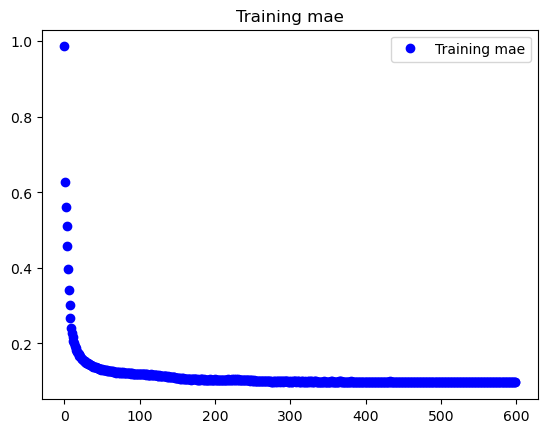

In [17]:
import matplotlib.pyplot as plt

plt.figure()
mae = history.history['mae']
epochs = range(len(mae)) # 横坐标的长度
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
#线条
plt.plot(epochs, mae, 'bo', label='Training mae')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training mae')#标题
plt.legend() #角标

plt.show()

Text(0.5, 1.0, 'Training  loss')

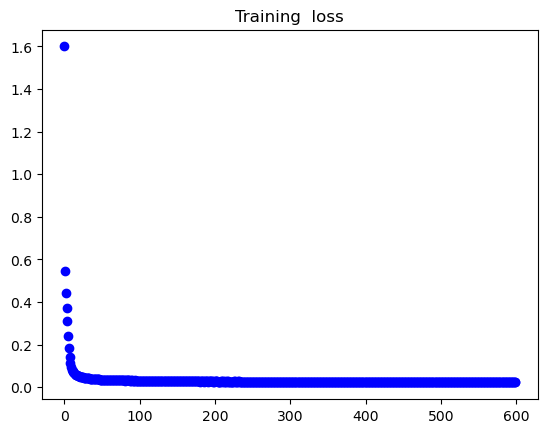

In [18]:
plt.figure()
#线条
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training  loss') #标题

146/146 [==============================] - 1s 7ms/step - loss: 0.0033 - mae: 0.0427
MSE Train loss: [0.0032769532408565283, 0.04267045110464096]
63/63 [==============================] - 0s 7ms/step - loss: 4.9655e-04 - mae: 0.0193
MSE Test loss: [0.0004965452826581895, 0.019286176189780235]


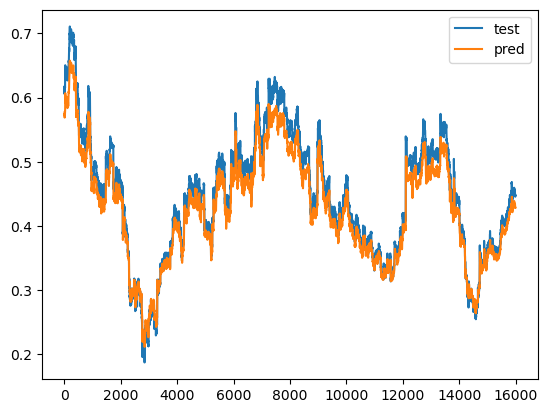

In [19]:
y_pred =ts_encoder.predict(X_test)

print('MSE Train loss:', ts_encoder.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test loss:', ts_encoder.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()